## **Identifying Key Contributors to Road Traffic Accidents Using XGBoost and Exploratory Data Analysis**
### Objectives
* To explore and analyze road traffic crash data to understand patterns and trends in accidents.
* To develop a predictive machine learning model to classify accident severity levels.
* To evaluate the performance of the predictive model using appropriate metrics such as accuracy, precision, recall, and F1-score.
* To provide data-driven recommendations for improving road safety and reducing accident severity.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
sns.set_style('darkgrid', {'axes.facecolor':'0.9'})

In [2]:
crashes=pd.read_csv('./data/Traffic_Crashes_-_Crashes.csv.gz')
people=pd.read_csv('./data/Traffic_Crashes_-_People.csv.gz')
vehicles=pd.read_csv('./data/Traffic_Crashes_-_Vehicles.csv.gz')

c:\Users\Victor\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\Users\Victor\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (20,39,40,41,47,48,49,57,58,60) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54959 entries, 0 to 54958
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                54959 non-null  object 
 1   CRASH_DATE_EST_I               3503 non-null   object 
 2   CRASH_DATE                     54959 non-null  object 
 3   POSTED_SPEED_LIMIT             54959 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         54959 non-null  object 
 5   DEVICE_CONDITION               54959 non-null  object 
 6   WEATHER_CONDITION              54959 non-null  object 
 7   LIGHTING_CONDITION             54959 non-null  object 
 8   FIRST_CRASH_TYPE               54959 non-null  object 
 9   TRAFFICWAY_TYPE                54959 non-null  object 
 10  LANE_CNT                       6 non-null      float64
 11  ALIGNMENT                      54959 non-null  object 
 12  ROADWAY_SURFACE_COND           54959 non-null 

In [4]:
crashes.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [5]:
crashes.CRASH_RECORD_ID.duplicated().sum()

0

In [6]:
crashes.MOST_SEVERE_INJURY.value_counts()

NO INDICATION OF INJURY     45514
NONINCAPACITATING INJURY     4982
REPORTED, NOT EVIDENT        3502
INCAPACITATING INJURY         809
FATAL                          47
Name: MOST_SEVERE_INJURY, dtype: int64

In [7]:
crashes['IS_INCAPACITATING_OR_FATAL'] = (
    (crashes['INJURIES_INCAPACITATING'] > 0) |
    (crashes['INJURIES_FATAL'] > 0)
)

In [8]:
crashes.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,IS_INCAPACITATING_OR_FATAL
0,d4532856f89a7311fb6182ffef7cd3c27fdba4dba40671...,NaN,12/30/2025 11:50:00 PM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,1.0,1.0,0.0,23,3,12,41.743702,-87.624186,POINT (-87.624185929083 41.743702317364),False
1,b938fbfa86d8b2d58d26656bf3266bc5452af63bd100ad...,NaN,12/30/2025 11:21:00 PM,30,UNKNOWN,UNKNOWN,SNOW,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,...,0.0,1.0,0.0,23,3,12,41.853734,-87.653792,POINT (-87.653792075361 41.85373399224),False
2,bb8c152ed4e0d29961e051b7d381508f1f9ea5aa051dbe...,NaN,12/30/2025 10:55:00 PM,30,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,2.0,0.0,22,3,12,41.906573,-87.687268,POINT (-87.687268089375 41.906573215648),False
3,40064b1f9d498293c9392d4c89bb60128409738a3c44d1...,NaN,12/30/2025 10:51:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,1.0,3.0,0.0,22,3,12,41.807373,-87.622931,POINT (-87.622930554709 41.807373001937),False
4,efce3ab254c9daaacb6ce6a60e10e8cb8ca50ab3f7ea5b...,NaN,12/30/2025 10:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,2.0,0.0,22,3,12,41.928409,-87.702567,POINT (-87.702567230162 41.928408615992),False


In [9]:
crashes.CRASH_MONTH.value_counts()

8     10191
7      9825
10     9051
9      9039
11     8521
12     8332
Name: CRASH_MONTH, dtype: int64

In [10]:
crashes.INJURIES_FATAL.value_counts()

0.0    54807
1.0       41
2.0        6
Name: INJURIES_FATAL, dtype: int64

In [11]:
crashes.STREET_NAME.value_counts()

WESTERN AVE    1579
CICERO AVE     1250
PULASKI RD     1245
ASHLAND AVE    1162
HALSTED ST     1003
               ... 
125TH ST          1
OAKVIEW AVE       1
ALLEN AVE         1
LEE PKWY          1
EDMUNDS ST        1
Name: STREET_NAME, Length: 1236, dtype: int64

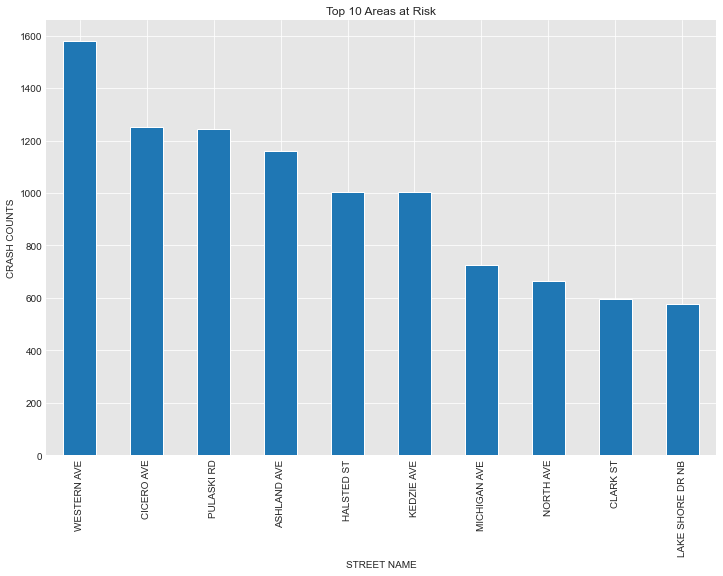

In [12]:
# top 10 areas at risk
top_10_risk_areas = crashes.STREET_NAME.value_counts().head(10)
top_10_risk_areas.plot(kind='bar', figsize=(12,8))
plt.title('Top 10 Areas at Risk')
plt.ylabel('CRASH COUNTS')
plt.xlabel('STREET NAME');

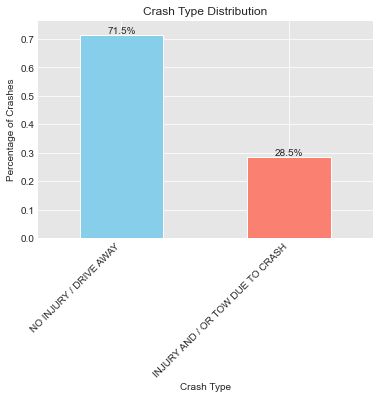

In [13]:
crash_type = crashes['CRASH_TYPE'].value_counts(normalize=True)
# Bar plot
crash_type.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Crash Type Distribution')
plt.xlabel('Crash Type')
plt.ylabel('Percentage of Crashes')
plt.ylim(0, crash_type.max() + 0.05)
plt.xticks(rotation=45, ha='right')
for i, rate in enumerate(crash_type):
    plt.text(
        i,
        rate + 0.005,
        f"{rate:.1%}",
        ha='center',
        fontsize=10
    );

## Analyzing primary contributing causes

In [14]:
crashes.PRIM_CONTRIBUTORY_CAUSE.value_counts().head(10)

UNABLE TO DETERMINE                       22702
FAILING TO YIELD RIGHT-OF-WAY              6533
FOLLOWING TOO CLOSELY                      4989
IMPROPER OVERTAKING/PASSING                3034
NOT APPLICABLE                             2457
FAILING TO REDUCE SPEED TO AVOID CRASH     2269
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE        2189
IMPROPER TURNING/NO SIGNAL                 1899
IMPROPER LANE USAGE                        1833
IMPROPER BACKING                           1703
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

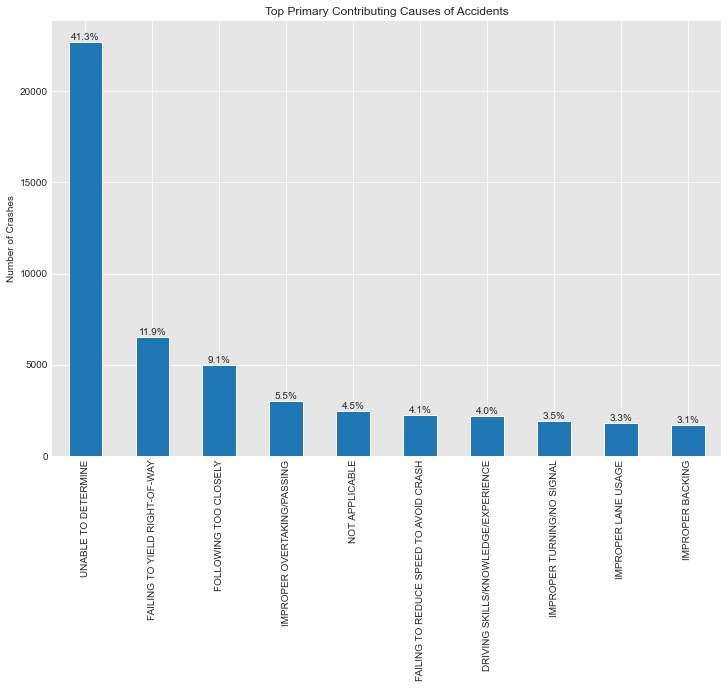

In [15]:
crashes.PRIM_CONTRIBUTORY_CAUSE.value_counts().head(10).plot(kind='bar', figsize=(12,8))
plt.title("Top Primary Contributing Causes of Accidents")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=90)
total = crashes.PRIM_CONTRIBUTORY_CAUSE.value_counts().sum()
for i, rate in enumerate(crashes.PRIM_CONTRIBUTORY_CAUSE.value_counts().head(10)):
    plt.text(
        i,
        rate,
        f"{rate/total:.1%}",
        ha='center',
        va='bottom',
        fontsize=10
    );

## Time-Based Analysis

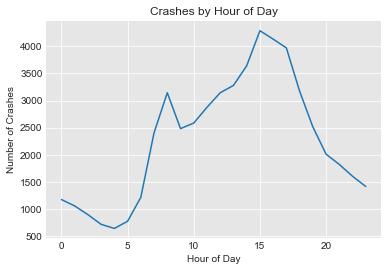

In [16]:
crashes['CRASH_HOUR'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.title("Crashes by Hour of Day");

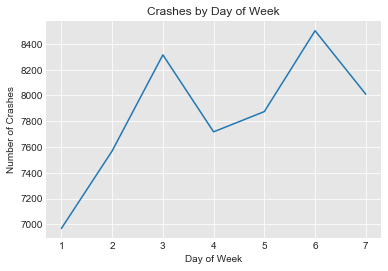

In [17]:
crashes['CRASH_DAY_OF_WEEK'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crashes')
plt.title("Crashes by Day of Week");

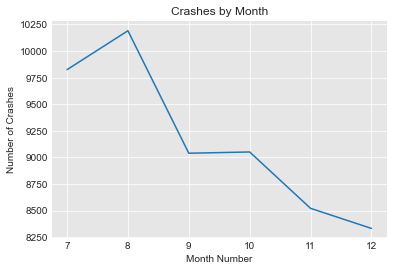

In [18]:
# Car crash distribution monthly
crashes['CRASH_MONTH'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Month Number')
plt.ylabel('Number of Crashes')
plt.title("Crashes by Month");

## Statistical Tests

H<sub>0</sub>: Weather condition does not affect injuries VS
H<sub>1</sub>: Weather affects injuries at 1% level of significance

In [19]:
from scipy.stats import f_oneway

groups = [
    crashes[crashes['WEATHER_CONDITION'] == w]['INJURIES_TOTAL'].dropna()
    for w in crashes['WEATHER_CONDITION'].unique()
]

f_oneway(*groups)


F_onewayResult(statistic=33.09543370676391, pvalue=4.556481887857097e-71)

## Weather significantly affects the number of injuries.

H<sub>0</sub>: Lighting condition does not affect injuries VS
H<sub>1</sub>: Lighting affects injuries at 1% level of significance

In [20]:
groups = [
    crashes[crashes['LIGHTING_CONDITION'] == w]['INJURIES_TOTAL'].dropna()
    for w in crashes['LIGHTING_CONDITION'].unique()
]

f_oneway(*groups)

F_onewayResult(statistic=88.11142785500279, pvalue=1.2734770215895415e-92)

## Lighting condition affects the number of injuries at 1% level of significance.

In [21]:
crashes=crashes[['CRASH_RECORD_ID','WEATHER_CONDITION','LIGHTING_CONDITION','CRASH_TYPE','CRASH_HOUR','CRASH_MONTH','NUM_UNITS','IS_INCAPACITATING_OR_FATAL']]

In [22]:
vehicles.columns

Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE',
       'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY',
       'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
       'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
       'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       'TRAILER1_

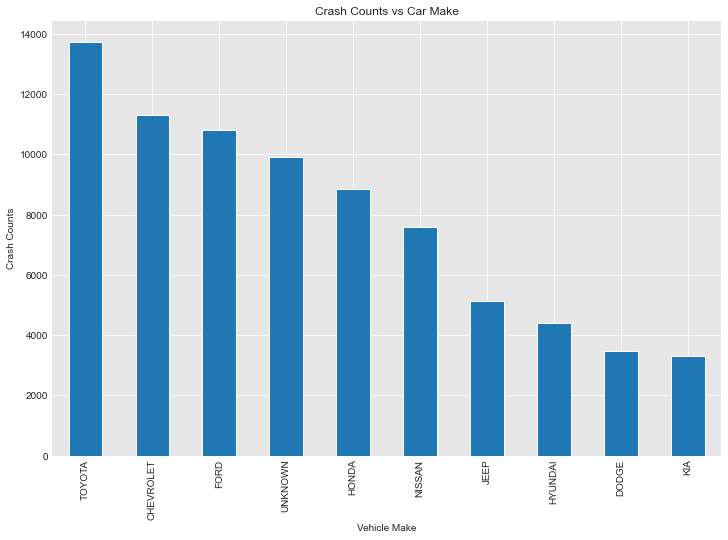

In [23]:
vehicles.MAKE.value_counts().head(10).plot(kind='bar', figsize=(12,8))
plt.xlabel('Vehicle Make')
plt.ylabel('Crash Counts')
plt.title('Crash Counts vs Car Make');

In [24]:
people.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

In [25]:
people.DRIVER_ACTION.value_counts()

NONE                                 32986
UNKNOWN                              25952
OTHER                                10155
FAILED TO YIELD                       8617
FOLLOWED TOO CLOSELY                  4791
IMPROPER LANE CHANGE                  2546
IMPROPER TURN                         2417
IMPROPER BACKING                      2400
IMPROPER PASSING                      2337
DISREGARDED CONTROL DEVICES           1735
TOO FAST FOR CONDITIONS               1039
WRONG WAY/SIDE                         437
OVERCORRECTED                          357
IMPROPER PARKING                       348
CELL PHONE USE OTHER THAN TEXTING      119
EVADING POLICE VEHICLE                 110
EMERGENCY VEHICLE ON CALL               92
TEXTING                                 25
STOPPED SCHOOL BUS                      15
LICENSE RESTRICTIONS                     3
Name: DRIVER_ACTION, dtype: int64

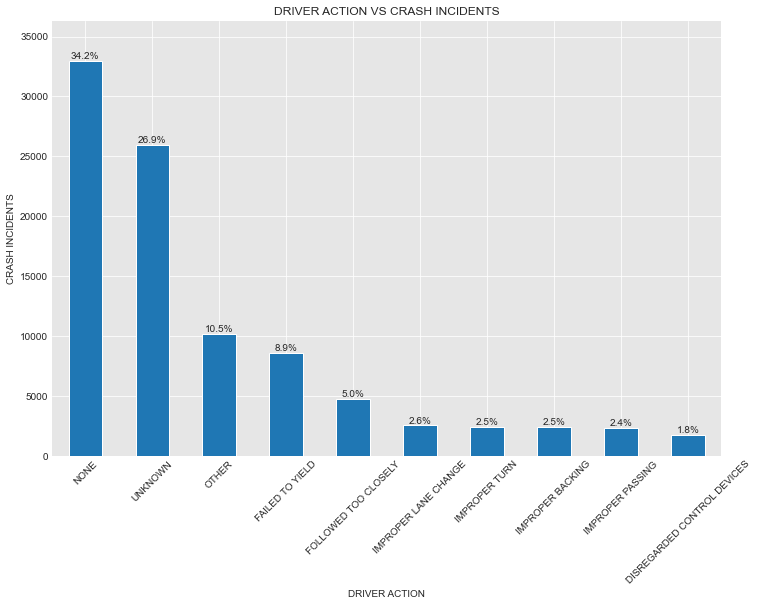

In [26]:
people.DRIVER_ACTION.value_counts().head(10).plot(kind='bar', figsize=(12,8))
plt.title('DRIVER ACTION VS CRASH INCIDENTS')
plt.xlabel('DRIVER ACTION')
plt.ylabel('CRASH INCIDENTS')
plt.xticks(rotation=45)

plt.ylim(0, people.DRIVER_ACTION.value_counts().max() * 1.1)
total = people.DRIVER_ACTION.value_counts().sum()

for i, rate in enumerate(people.DRIVER_ACTION.value_counts().head(10)):
    plt.text(
        i,
        rate,
        f"{rate/total:.1%}",
        ha='center',
        va='bottom',
        fontsize=10
    )


In [27]:
people.CRASH_RECORD_ID.duplicated().sum()

65207

In [28]:
vehicles.CRASH_RECORD_ID.duplicated().sum()

56768

In [29]:
vehicle_agg = vehicles.groupby('CRASH_RECORD_ID').agg({
    'VEHICLE_TYPE': 'nunique',
    'OCCUPANT_CNT': 'sum',
    'VEHICLE_DEFECT': lambda x: (x != 'NONE').sum()
}).reset_index()

In [30]:
vehicle_agg.VEHICLE_DEFECT.value_counts()

2     20783
0     16948
1     15680
3      1241
4       229
5        55
6        17
7         3
13        1
11        1
8         1
Name: VEHICLE_DEFECT, dtype: int64

In [31]:
vehicle_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54959 entries, 0 to 54958
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CRASH_RECORD_ID  54959 non-null  object 
 1   VEHICLE_TYPE     54959 non-null  int64  
 2   OCCUPANT_CNT     54959 non-null  float64
 3   VEHICLE_DEFECT   54959 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.7+ MB


In [32]:
vehicle_agg.VEHICLE_TYPE.value_counts()

1    29104
2    25355
3      476
4       22
0        2
Name: VEHICLE_TYPE, dtype: int64

In [33]:
people_agg = people.groupby('CRASH_RECORD_ID').agg({
    'AGE': 'mean',
    'SAFETY_EQUIPMENT': lambda x: ((x == 'SAFETY BELT USED') | 
                                   (x == 'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)') |
                                   (x == 'CHILD RESTRAINT - REAR FACING') |
                                   (x == 'CHILD RESTRAINT - FORWARD FACING') |
                                   (x == 'BOOSTER SEAT')).sum()
}).reset_index()

In [34]:
people_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54854 entries, 0 to 54853
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CRASH_RECORD_ID   54854 non-null  object 
 1   AGE               45740 non-null  float64
 2   SAFETY_EQUIPMENT  54854 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [35]:
people_agg.AGE.fillna(people_agg.AGE.mean(), inplace=True)

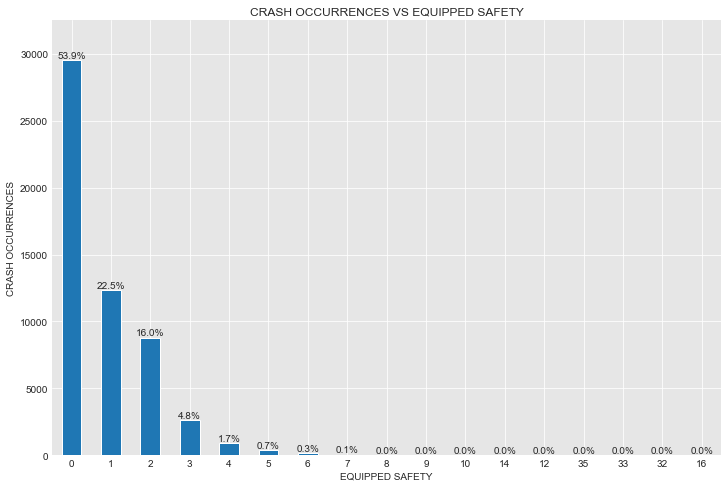

In [36]:
# Crash occurence vs safety equipment plot
equipment_rates=people_agg.SAFETY_EQUIPMENT.value_counts()
equipment_rates.plot(kind='bar', figsize=(12,8))
plt.title('CRASH OCCURRENCES VS EQUIPPED SAFETY')
plt.xlabel('EQUIPPED SAFETY')
plt.ylabel('CRASH OCCURRENCES')
plt.xticks(rotation=0)
plt.ylim(0, equipment_rates.max() * 1.1)
total = equipment_rates.sum()

for i, rate in enumerate(equipment_rates):
    plt.text(
        i,
        rate,
        f"{rate/total:.1%}",
        ha='center',
        va='bottom',
        fontsize=10
    )


In [37]:
vehicle_people_df=pd.merge(people_agg, vehicle_agg, on='CRASH_RECORD_ID', how='inner')
final_df=pd.merge(crashes, vehicle_people_df, on='CRASH_RECORD_ID', how='inner')

In [38]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54854 entries, 0 to 54853
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CRASH_RECORD_ID             54854 non-null  object 
 1   WEATHER_CONDITION           54854 non-null  object 
 2   LIGHTING_CONDITION          54854 non-null  object 
 3   CRASH_TYPE                  54854 non-null  object 
 4   CRASH_HOUR                  54854 non-null  int64  
 5   CRASH_MONTH                 54854 non-null  int64  
 6   NUM_UNITS                   54854 non-null  int64  
 7   IS_INCAPACITATING_OR_FATAL  54854 non-null  bool   
 8   AGE                         54854 non-null  float64
 9   SAFETY_EQUIPMENT            54854 non-null  int64  
 10  VEHICLE_TYPE                54854 non-null  int64  
 11  OCCUPANT_CNT                54854 non-null  float64
 12  VEHICLE_DEFECT              54854 non-null  int64  
dtypes: bool(1), float64(2), int64(6

## MODELLING